#### Importação das bibliotecas necessárias

In [1]:
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
import pandas as pd

#### Carregando a base de dados iris

In [2]:
iris = load_iris()

#### Verificando a descrição do dataset

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### Verificando features names, target e dados

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Dividindo os dados em treino e teste

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

#### Verificando a forma dos dados

In [9]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [10]:
y_train.shape,y_test.shape

((105,), (45,))

#### Instânciando o objeto classificador

In [11]:
clf = tree.DecisionTreeClassifier()

#### Parâmetros do classificador DecisionTreeClassifier

* criterion: medida de qualidade da divisão
<p>criterion='gini', # gini vem por default, mas podemos optar por entropy

* splitter: estratégia utilizada para dividir o nó de decisão
<p>splitter='best', ela também pode ser feita de forma randômica utilizando 'random'

* max_depth= None: profundidade máxima da árvore, se for None ela vai buscar a máxima pureza possível    
* min_samples_split = 2: número de amostras mínimas para considerar um nó para divisão    
* min_samples_leaf: 1, # o mínimo de registros necessários em cada nós-folha
* max_features = None, # o número de atributos que será considerado durante o split. None -> seleciona todos os atributos, 'sqrt' -> raiz quadrada do número dos atributos, 'log2' -> log de base 2 do número de atributos
* max_leaf_nodes=None, # a quantidade máxima de nós-folha que a árvore pode ter, se for None ele não limitará o número de nós-folha
* min_impurity_decrease=0.0, # o split irá ocorrer em cada nó se o decréscimo da impureza foi maior ou igual a este valor
* random_state= 42, # permite o notebook ser reproduzível



#### Treinando o modelo de árvore de decisão

In [12]:
clf = clf.fit(X_train, y_train)

#### Verificando as features mais importantes para o modelo de arvore de decisão treinado
No scikit-learn, optou-se por utilizar o gini importance

In [13]:
clf.feature_importances_

array([0.0214344 , 0.        , 0.05735151, 0.92121408])

In [14]:
for feature,importancia in zip(iris.feature_names,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

sepal length (cm):0.02143440391943386
sepal width (cm):0.0
petal length (cm):0.05735151318983655
petal width (cm):0.9212140828907295


#### Executando o algoritmo de arvore de decisão com o conjunto de teste

In [15]:
resultado = clf.predict(X_test)
resultado

array([0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1,
       2])

#### Testando com uma nova amostra

In [16]:
test = np.array([[5.1,3.5,1.4,0.2]])
clf.predict(test)

array([0])

#### Verificando a Probabilidade

In [17]:
clf.predict_proba(test)

array([[1., 0., 0.]])

#### Métricas de Validação

In [18]:
from sklearn import metrics

In [19]:
print(metrics.classification_report(y_test, resultado, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      0.94      0.91        16
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



In [20]:
import pydot
import graphviz 
from ipywidgets import interactive

In [46]:
import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
#os.environ["PATH"] += os.pathsep + 'c:/users/vinic/appdata/local/programs/python/python39/lib/site-packages/graphviz/'
#os.environ["PATH"] += os.pathsep + 'c:/users/vinic/appdata/local/programs/python/python39/'

#### Visualizando de forma gráfica a arvore gerada

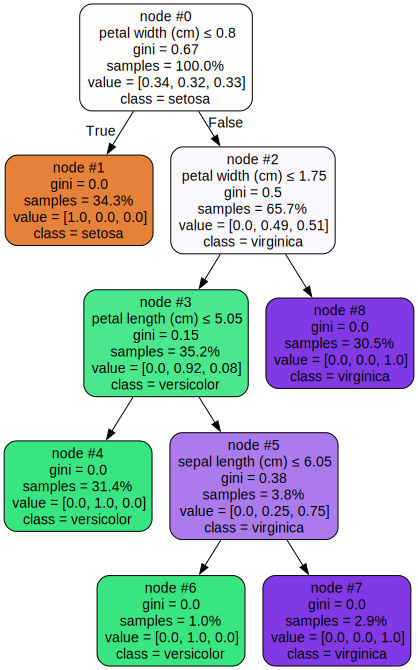

In [21]:
dot_data = tree.export_graphviz(
         clf, # árvore de decisão a ser exportada
         #out_file=None,  # nome do arquivo output
         precision=2, # número de digitos da precisão
         feature_names=iris.feature_names,
         class_names=iris.target_names,  # lista do nome das classes
         filled=True, # pinta os nós de acordo com cada classe
         rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all', # root as informações das features aparecem apenas na raíz
         #leaves_parallel = True,# faz com que as folhas fiquem paralelas
         #rotate = True, # retorna a árvore na horizontal
         special_characters=True # quando False ignora os caracteres especiais
        )  
graph = graphviz.Source(dot_data)  
graph

#### Bibliotecas necessárias apra renderização da arvore de forma interativa

In [22]:
from IPython.display import SVG, display
from graphviz import Source
from ipywidgets import interactive

In [23]:
# load dataset
data = load_iris()

# feature matrix
X = data.data

# target vector
y = data.target

# feature labels
features_label = data.feature_names

# class label
class_label = data.target_names


def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = tree.DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_split
          ,min_samples_leaf=min_leaf
    )

    estimator.fit(X, y)
    graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…